# 4 神经网络简介
目前最广泛使用的定义是Kohonen于1988年的描述，神经网络是由具有适应性的简单单元组成的广泛并行互连的网络，它的组织能够模拟生物神经系统对真实世界物体所做出的交互反应。

## 4.1 概述
在生物神经网络中，每个神经元与其他神经元相连，当它兴奋时，就会向相连的神经元发送化学物质，从而改变这些神经元内的电位；如果某神经元的电位超过了一个阈值，那么它就会激活，即兴奋起来并向其他神经元发送化学物质。

在深度学习中也借鉴了这样的结构，每一个神经元（上面说到的简单单元）接受输入x，通过带权重w的连接进行传递，将总输入信号与神经元的阈值进行比较，最后通过激活函数处理确定是否激活，并将激活后的计算结果y输出，而我们所说的训练，所训练的就是这里面的权重w。
[神经网络 - David Kriesel](http://www.dkriesel.com/en/science/neural_networks)
## 4.2 神经网络的表示
我们可以将神经元拼接起来，两层神经元，即输入层+输出层(M-P神经元)，构成感知机。 而多层功能神经元相连构成神经网络，输入层与输出层之间的所有层神经元，称为隐藏层：
输入层和输出层一般只有一个，中间的隐藏层可以有很多层（输出层也可以多个，例如经典的GoogleNet，后面会详细介绍）
## 4.3 激活函数
介绍神经网络的时候已经说到，神经元会对化学物质的刺激进行，当达到一定程度的时候，神经元才会兴奋，并向其他神经元发送信息。神经网络中的激活函数就是用来判断我们所计算的信息是否达到了往后面传输的条件。
### 4.3.1 为什么激活函数都是非线性的
在神经网络的计算过程中，每层都相当于矩阵相乘，无论神经网络有多少层输出都是输入的线性组合，就算我们有几千层的计算，无非还是个矩阵相乘，和一层矩阵相乘所获得的信息差距不大，所以需要激活函数来引入非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中，增加了神经网络模型泛化的特性。

早期研究神经网络主要采用sigmoid函数或者tanh函数，输出有界，很容易充当下一层的输入。 近些年Relu函数及其改进型（如Leaky-ReLU、P-ReLU、R-ReLU等），由于计算简单、效果好所以在多层神经网络中应用比较多。

下面来总结下较常见的激活函数：

In [12]:
# 初始化一些信息
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x= torch.linspace(-10,10,60)

### 4.3.2 sigmoid 
sigmoid公式：
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
导数：
$$ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $$
推导过程
$$
\begin{aligned}
\sigma'(x) &= \frac{d}{dx}\sigma(x) \\
&= \frac{d}{dx}\frac{1}{1+e^{-x}} \\
&= \frac{d}{dx}(1+e^{-x})^{-1} \\
&= -(1+e^{-x})^{-2}(-e^{-x}) \\
&= \frac{e^{-x}}{(1+e^{-x})^{2}} \\
&= \frac{1}{1+e^{-x}}\cdot\frac{e^{-x}}{1+e^{-x}} \\
&= \sigma(x)(1-\sigma(x))
\end{aligned}
$$


在sigmoid函数中我们可以看到，其输出是在(0,1)这个开区间，它能够把输入的连续实值变换为0和1之间的输出，如果是非常大的负数，那么输出就是0；如果是非常大的正数输出就是1，起到了抑制的作用。

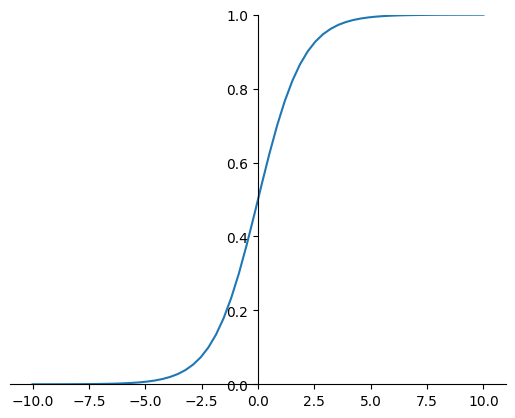

In [14]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((0, 1))
sigmod=torch.sigmoid(x)
x = x.cpu()
sigmod = sigmod.cpu()
plt.plot(x.numpy(),sigmod.numpy())

但是sigmod由于需要进行指数运算（这个对于计算机来说是比较慢，相比relu），再加上函数输出不是以0为中心的（这样会使权重更新效率降低），当输入稍微远离了坐标原点，函数的梯度就变得很小了（几乎为零）。在神经网络反向传播的过程中不利于权重的优化，这个问题叫做梯度饱和，也可以叫梯度弥散。这些不足，所以现在使用到sigmod基本很少了，基本上只有在做二元分类（0，1）时的输出层才会使用。
### 4.3.3 tanh函数
函数
$$ \operatorname{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$
导数
$$ \frac{d}{dx}\operatorname{tanh}(x) = 1 - \operatorname{tanh}^{2}(x) $$
推导过程
$$
\begin{aligned}
\frac{d}{dx}\operatorname{tanh}(x) &= \frac{d}{dx}\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \\
&= \frac{(e^{x} + e^{-x})\frac{d}{dx}(e^{x} - e^{-x}) - (e^{x} - e^{-x})\frac{d}{dx}(e^{x} + e^{-x})}{(e^{x} + e^{-x})^{2}} \\
&= \frac{(e^{x} + e^{-x})(e^{x} + e^{-x}) - (e^{x} - e^{-x})(e^{x} - e^{-x})}{(e^{x} + e^{-x})^{2}(e^{x} + e^{-x})^{2}} \\
&= \frac{(e^{x} + e^{-x})^{2} - (e^{x} - e^{-x})^{2}}{(e^{x} + e^{-x})^{2}(e^{x} + e^{-x})^{2}} \\
&= \frac{(e^{x} + e^{-x})^{2} - (e^{x} - e^{-x})^{2}}{(e^{x} + e^{-x})^{4}} \\
&= \frac{4e^{x}e^{-x}}{(e^{x} + e^{-x})^{4}} \\
&= \frac{4}{(e^{x} + e^{-x})^{2}} - \frac{4}{(e^{x} + e^{-x})^{4}} \\
&= \frac{1 + \operatorname{tanh}^{2}(x)}{\operatorname{cosh}^{2}(x)} - \frac{4}{(e^{x} + e^{-x})^{2}} \\
&= 1 - \frac{2}{(e^{x} + e^{-x})^{2}} \\
&= 1 - \operatorname{tanh}^{2}(x)
\end{aligned}
$$

与sigmoid函数类似，当输入稍微远离了坐标原点，梯度还是会很小，但是好在tanh是以0为中心点，如果使用tanh作为激活函数，还能起到归一化（均值为0）的效果。

一般二分类问题中，隐藏层用tanh函数，输出层用sigmod函数，但是随着Relu的出现所有的隐藏层基本上都使用relu来作为激活函数了


### 4.3.4 Relu（Rectified Linear Units）修正线性单元
函数
$$ReLU(x) = max(0, z)$$
导数
$$
\frac{d}{dx}ReLU(x) = 
\left \{
    \begin{array}{c}
        0, x \lt 0 \\
        1, x \ge 0 \\
    \end{array}
\right.
$$

也就是说： z>0时，梯度始终为1，从而提高神经网络基于梯度算法的运算速度。然而当 z<0时，梯度一直为0。 ReLU函数只有线性关系（只需要判断输入是否大于0）不管是前向传播还是反向传播，都比sigmod和tanh要快很多。

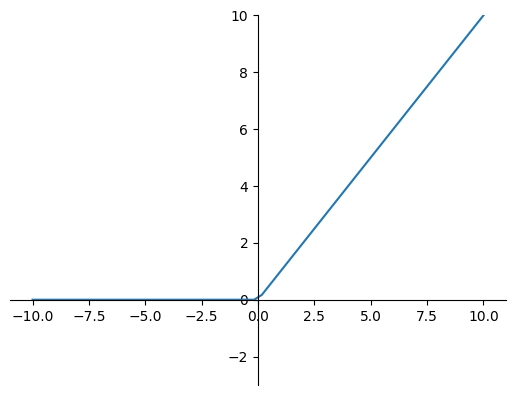

In [15]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
relu=F.relu(x)
plt.plot(x.numpy(),relu.numpy())

当输入是负数的时候，ReLU是完全不被激活的，这就表明一旦输入到了负数，ReLU就会死掉。但是到了反向传播过程中，输入负数，梯度就会完全到0，这个和sigmod函数、tanh函数有一样的问题。 但是实际的运用中，该缺陷的影响不是很大。

### 4.3.4 Leaky Relu 函数
函数
$$ LeakyReLU(x)=max(\alpha z,z)$$
导数
$$
\frac{d}{dx}LeakyReLU(x) = 
\left \{
    \begin{array}{c}
        \alpha, x \lt 0 \\
        1, x \ge 0 \\
    \end{array}
\right.
$$
为了解决relu函数z<0时的问题出现了 Leaky ReLU函数，该函数保证在z<0的时候，梯度仍然不为0。 ReLU的前半段设为αz而非0，通常α=0.01。 

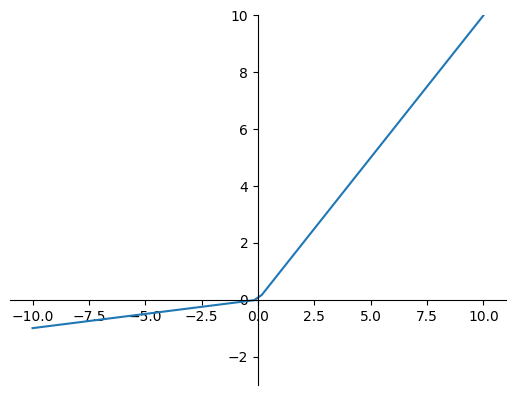

In [16]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
l_relu=F.leaky_relu(x,0.1) # 这里的0.1是为了方便展示，理论上应为0.01甚至更小的值
plt.plot(x.numpy(),l_relu.numpy())


### 4.3.5 Parametric Relu 函数
函数
$$PReLU(x)=max(\alpha x,x)$$
其中其中 $\alpha$ 是可学习参数。当 $a=0$ 时，PReLU 退化为 ReLU

导数
$$
\frac{d}{dx}PReLU(x) = 
\left \{
    \begin{array}{c}
        \alpha, x \lt 0 \\
        1, x \ge 0 \\
    \end{array}
\right.
$$
PReLU 不是使用固定的负数斜率，而是将其设置为可学习参数，从而提高模型的表达能力。

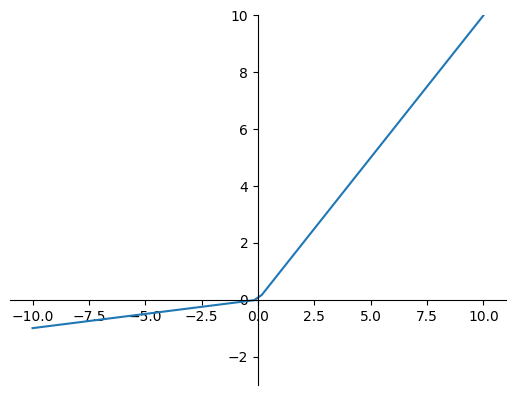

In [22]:
import torch.nn as nn
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
p_relu = nn.PReLU()
plt.plot(x.numpy(), l_relu.detach().numpy())


### 4.3.6 Exponential Relu 函数
函数
$$ELU(x)=max(\alpha x,x)$$
$\alpha$是一个超参数，用于控制负数区域的斜率。通常情况下，$\alpha$取较小的正值，例如0.1

导数
$$
\frac{d}{dx}ELU(x) = 
\left \{
    \begin{array}{c}
        \alpha(e^x - 1), x \lt 0 \\
        x, x \ge 0 \\
    \end{array}
\right.
$$
Exponential ReLU与普通的ReLU相比，具有更快的收敛速度和更好的性能表现，尤其是在大型深度神经网络中。但是算力要求更高

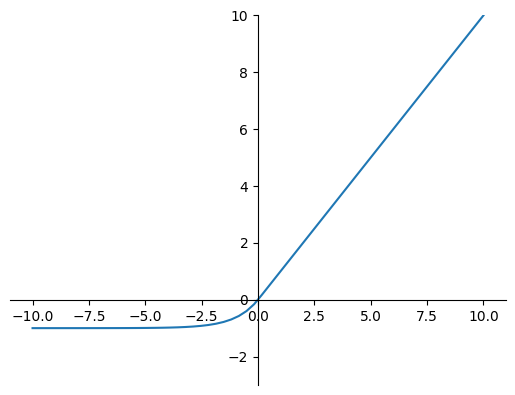

In [23]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
elu = F.elu(x)
plt.plot(x.numpy(), elu.numpy())


理论上来讲，各种变形 ReLU有ReLU的所有优点，但是在实际操作当中，并没有完全证明总是好于ReLU。
ReLU目前仍是最常用的activation function，在隐藏层中推荐优先尝试！

## 4.4 深入理解前向传播和反向传播
在最后我们再详细说下神经网络中的前向传播和反向传播
### 4.4.1 正向传播
对于一个神经网络来说，把输入特征$a^{[0]}$这个输入值就是我们的输入x，放入第一层并计算第一层的激活函数，用$a^{[1]}$表示，本层中训练的结果用$W^{[1]}$和$b^{[l]}$来表示，这两个值与计算的结果$z^{[l]}$值都需要进行缓存，而计算的结果还需要通过激活函数生成激活后的$a^{[l]}$，即第一层的输出值，这个值会作为第二层的输入传到第二层，第二层里，需要用到$W^{[2]}$和$b^{[2]}$，计算结果为$z^{[2]}$，第二层的激活函数$a^{[2]}$。 后面几层以此类推，直到最后算出了$a^{[L]}$，第L层的最终输出值 $\hat y$，即我们网络的预测值。正向传播其实就是我们的输入x通过一系列的网络计算，得到$\hat y$的过程。

在这个过程里我们缓存的值，会在后面的反向传播中用到。

### 4.4.2 反向传播
对反向传播的步骤而言，就是对正向传播的一系列的反向迭代，通过反向计算梯度，来优化我们需要训练的W和b。 把$\delta a^{[l]}$值进行求导得到$\delta a^{[l-1]}$，以此类推，直到我们得到$\delta a^{[2]}$和$\delta a^{[1]}$。反向传播步骤中也会输出$\delta W^{[l]}$和$\delta b^{[l]}$。这一步我们已经得到了权重的变化量，下面我们要通过学习率来对训练的W和b进行更新
$$W=W-\alpha{\delta}W$$
$$b=b-\alpha{\delta}b$$
这样反向传播就算完成了